In [1]:
# Import Necessary Libraries

# numpy is imported for its powerful numerical and array handling capabilities,
# which are fundamental for mathematical operations in the project.
import numpy as np

# matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python,
# essential for visualizing the optimization process and results.
from matplotlib import pyplot as plt

# matplotlib.animation is specifically used for creating animations in the project,
# enabling dynamic visualizations of the optimization algorithm in action.
from matplotlib import animation
import matplotlib.style as style

In [2]:
def particle_swarm_optimizer(n, cost_func, boundaries, N=1000, W_lims=[0.9, 0.4], c1=2, c2=2):
    """
    Perform Particle Swarm Optimization (PSO).
    
    Parameters:
    - n: Number of agents
    - cost_func: Cost function to minimize
    - boundaries: Bounds on the solution space parameters
    - N: Number of iterations (default 1000)
    - W_lims: Inertia weight limits [upper, lower] (default [0.9, 0.4])
    - c1, c2: Cognitive and social scaling parameters (default 2)
    
    Returns:
    - gb_arr: Array containing the global best positions
    - p_arr: Array containing the positions of all particles
    - cost_arr: Array containing the cost associated with the global best positions
    """
    
    # Validate inputs
    if len(W_lims) != 2 or W_lims[0] < W_lims[1]:
        raise ValueError("W_lims should be a list of two elements where the first is larger.")

    if len(boundaries) != 2 or any(b[1] <= b[0] for b in boundaries):
        raise ValueError("Boundaries should be a list of [min, max] pairs.")

    # Initialize parameters
    W = np.linspace(W_lims[0], W_lims[1], N)
    D = len(boundaries)
    
    # Initialize arrays to store data
    gb_arr = np.empty((N, D))
    cost_arr = []
    p_arr = np.empty((N, n, D))

    # Initialize positions and velocities of agents
    deltas = np.array([b[1] - b[0] for b in boundaries])
    P = np.random.rand(n, D) * deltas + np.array([b[0] for b in boundaries])
    Pb = np.copy(P)
    v = np.random.rand(n, D) * 2 * deltas - deltas

    # Main optimization loop
    for i in range(N):
        costs = np.array([cost_func(agent) for agent in P])
        ind_min = np.argmin(costs)
        Gb = P[ind_min]

        # Update velocities and positions
        r1, r2 = np.random.rand(n, D), np.random.rand(n, D)
        v = W[i] * v + c1 * r1 * (Pb - P) + c2 * r2 * (Gb - P)
        P += v
        P = np.clip(P, [b[0] for b in boundaries], [b[1] for b in boundaries])

        # Update personal bests
        better_cost_indices = np.array([cost_func(P[j]) < cost_func(Pb[j]) for j in range(n)])
        Pb[better_cost_indices] = P[better_cost_indices]

        # Update data arrays
        gb_arr[i] = Gb
        cost_arr.append(costs[ind_min])
        p_arr[i] = P

    return gb_arr, p_arr, cost_arr

In [3]:
def cost(params):
    """
    Cost function for optimization.
    
    Parameters:
    - params: Array containing the parameter values
    
    Returns:
    - float: The calculated cost based on the input parameters
    """
    term1 = (params[0] - np.pi)**2
    term2 = (params[1] - np.e)**2
    term3 = np.sin(3 * params[0] + 0.41)
    term4 = np.sin(4 * params[1] - 1.73)
    
    return term1 + term2 + term3 + term4

In [4]:
# Perform Particle Swarm Optimization to find the optimal solution
n_agents = 10
boundaries = np.array([[0, 5], [0, 5]])  # Using np for consistency
n_iterations = 250

# Attempting to perform optimization
try:
    gb_arr, p_arr, cost_arr = particle_swarm_optimizer(n_agents, cost, boundaries, n_iterations)
except Exception as e:
    print(f"Error during optimization: {e}")
else:
    # Display the optimal solution and its cost
    optimal_solution = gb_arr[-1]
    optimal_cost = cost_arr[-1]
    print(f"The optimal solution: {optimal_solution.round(4)}")  # Rounded for readability
    print(f"Cost of the optimal solution: {optimal_cost:.4f}")  # Formatted to 4 decimal places

The optimal solution: [3.4577 3.1296]
Cost of the optimal solution: -1.6870


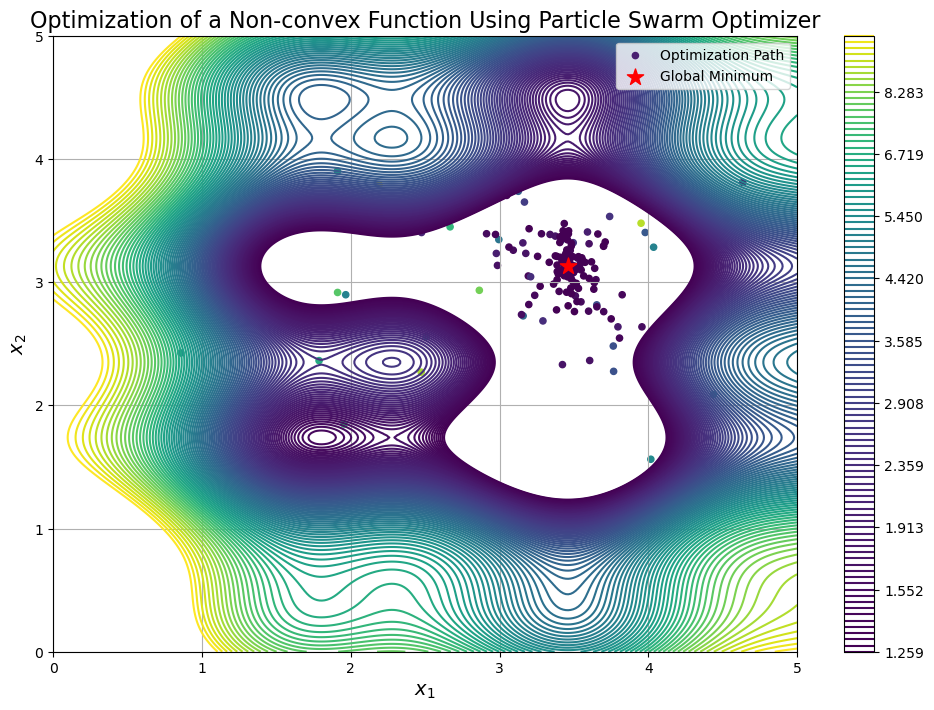

In [5]:
# Define grid size and generate grid points
n = 300  # Increased resolution for finer detail
x1 = np.linspace(0, 5, n)
x2 = np.linspace(0, 5, n)
X, Y = np.meshgrid(x1, x2)

# Calculate cost function values for the grid using list comprehension
Z = np.array([[cost([x, y]) for x in x1] for y in x2])

# Create figure for visualization
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted figure size for better display

# Plot the cost function grid
cp = ax.contour(X, Y, Z, cmap='viridis', levels=np.logspace(0.1, 1, 100))
plt.colorbar(cp, ax=ax)  # Adding a color bar for reference

# Average and split optimization results
opt_arr = np.mean(p_arr, axis=1)
param1, param2 = np.split(opt_arr, 2, axis=1)

# Plot optimization path and global minimum
ax.scatter(param1, param2, c=cost_arr, s=20, marker='o', label='Optimization Path')
ax.scatter(param1[-1], param2[-1], c='red', s=150, marker='*', label='Global Minimum')  # Enhanced marker for visibility

# Add labels and title
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_title(r'Optimization of a Non-convex Function Using Particle Swarm Optimizer', fontsize=16)

# Grid and legend for better readability
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.style as style

style.use('ggplot')  # Set the style for the plot

# Constants
LEVELS = 100
FIGSIZE = (14, 7)
ANIM_INTERVAL = 500
ANIM_FRAMES = n_iterations  # This needs to be defined previously in your code
MARKER_SIZE_AGENT = 5
MARKER_SIZE_GLOBAL_BEST = 10

# Define grid size and generate grid points for the contour plot
n = 300  # Increased resolution for finer detail
x1 = np.linspace(0, 5, n)
x2 = np.linspace(0, 5, n)
X, Y = np.meshgrid(x1, x2)

# Calculate cost function values for the grid using list comprehension
Z = np.array([[cost([x, y]) for x in x1] for y in x2])

# Initialize the plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIGSIZE)

# Calculate levels based on the range of Z
z_min, z_max = np.min(Z), np.max(Z)
levels = np.linspace(z_min, z_max, LEVELS)

# Subplot 1: Swarm Movement
cp = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', extend='both')
plt.colorbar(cp, ax=ax1)
global_best_plot, = ax1.plot(gb_arr[0][0], gb_arr[0][1], 'ro', markersize=MARKER_SIZE_GLOBAL_BEST, linestyle='')
agent_positions_plot, = ax1.plot(*np.array_split(p_arr[0], 2, axis=1), 'bx', markersize=MARKER_SIZE_AGENT, linestyle='')

# Setting limits for the axes based on the meshgrid ranges
ax1.set_xlim(X.min(), X.max())
ax1.set_ylim(Y.min(), Y.max())

# Adding axis titles for subplot 1
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('Swarm Movement')

# Subplot 2: Global Best Value Over Time
ax2.set_title("Global Best Value Over Time")
global_best_values = [cost_arr[0]]  # Assuming cost_arr stores the global best values
global_best_line, = ax2.plot(global_best_values, color='crimson')

# Adding axis titles for subplot 2
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Global Best Value')

# Animation update function
def update(frame, agent_positions_plot, global_best_plot, global_best_line):
    # Update positions in subplot 1
    positions = np.array_split(p_arr[frame], 2, axis=1)
    agent_positions_plot.set_data(*positions)

    # Updating the global best position
    global_best_plot.set_data(gb_arr[frame][0], gb_arr[frame][1])

    # Update global best line in subplot 2
    global_best_values.append(cost_arr[frame])
    global_best_line.set_data(range(len(global_best_values)), global_best_values)
    ax2.relim()
    ax2.autoscale_view()

    return agent_positions_plot, global_best_plot, global_best_line,

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=ANIM_FRAMES, fargs=(agent_positions_plot, global_best_plot, global_best_line), interval=ANIM_INTERVAL, blit=True, repeat=False)

# Display the plot
plt.show()

# Save the animation
anim.save('readme_visuals/animation.gif', writer='imagemagick', fps=30)

<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.
/var/folders/vd/l9212wp57rn73v8ygsk7jlvh0000gn/T/ipykernel_44870/207897832.py:64: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  global_best_plot.set_data(gb_arr[frame][0], gb_arr[frame][1])
